# Data Analysis

### Import Libraries & Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.tsa.filters.hp_filter import hpfilter
from sklearn.linear_model import LinearRegression

# Load cleaned data
data = pd.read_csv("../input/named_data_cleaned.csv")
data['datum'] = pd.to_datetime(data['datum'])
data = data.set_index('datum')

# List of all drug categories
drug_cols = [
    "Antiinflammatory", "Antirheumatic", "Analgesics", 
    "Antipyretics", "Psycholeptics", "Sedatives", 
    "Bronchodilators", "Antihistamines"
]

### Trend Analysis Using Regression Line

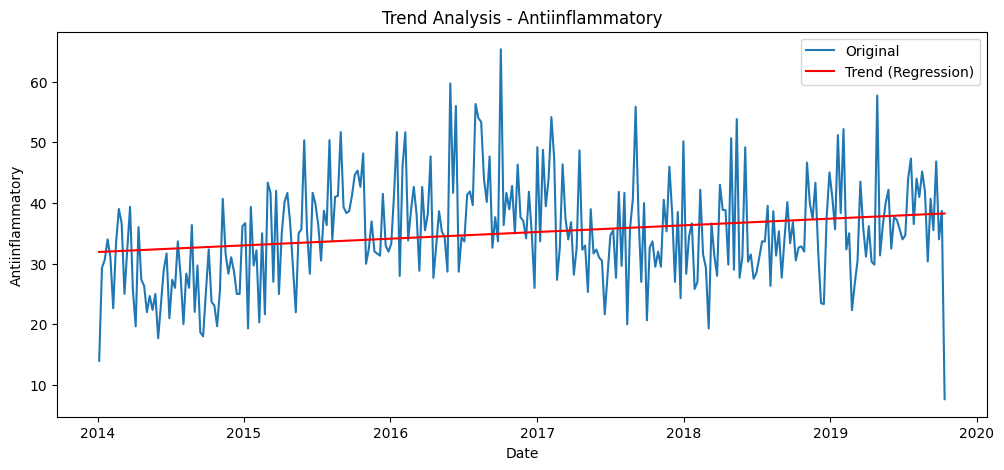

📌 Antiinflammatory Trend: Slope = 0.0211 (Increasing)



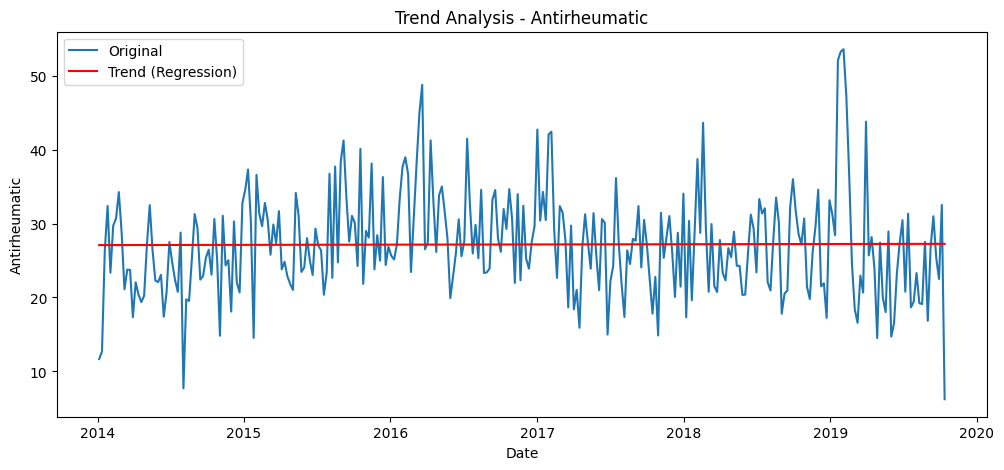

📌 Antirheumatic Trend: Slope = 0.0006 (Increasing)



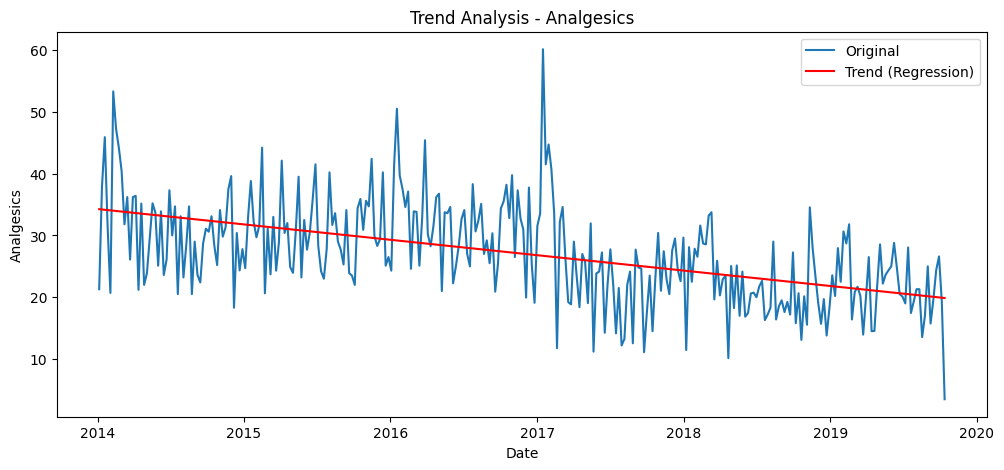

📌 Analgesics Trend: Slope = -0.0477 (Decreasing)



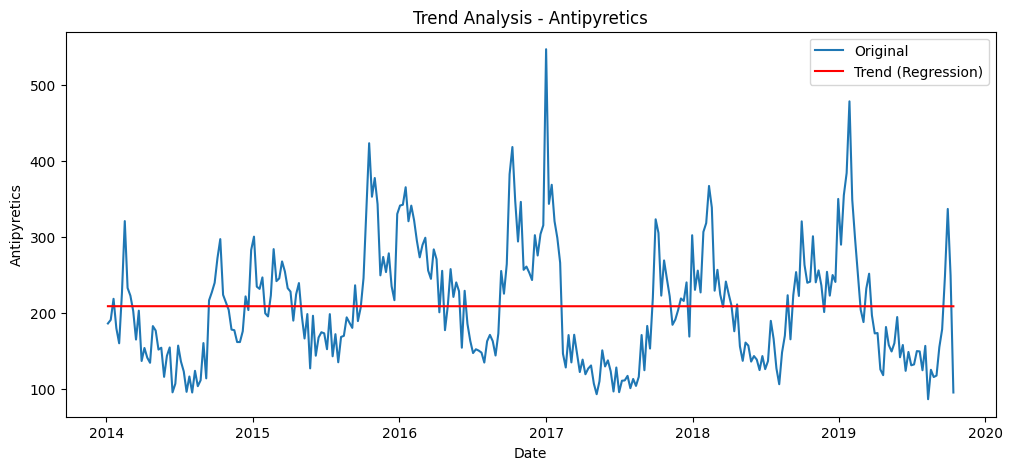

📌 Antipyretics Trend: Slope = -0.0003 (Decreasing)



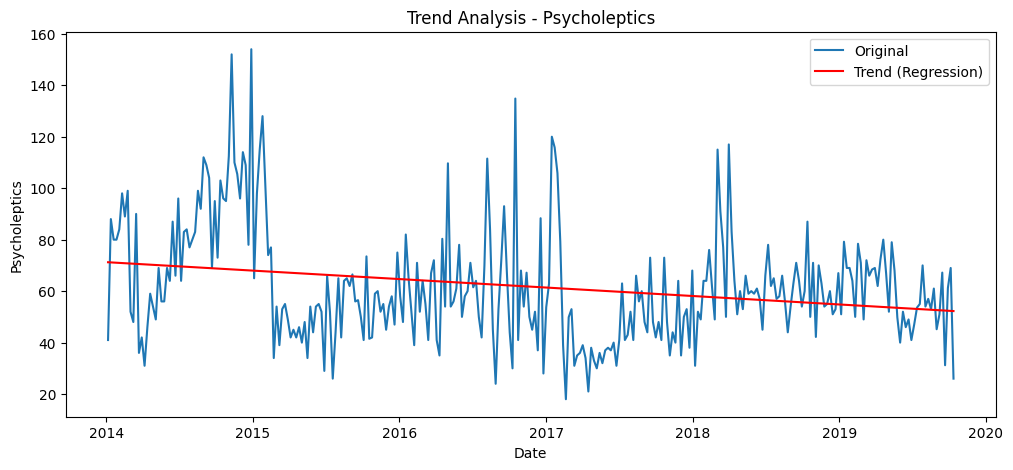

📌 Psycholeptics Trend: Slope = -0.0630 (Decreasing)



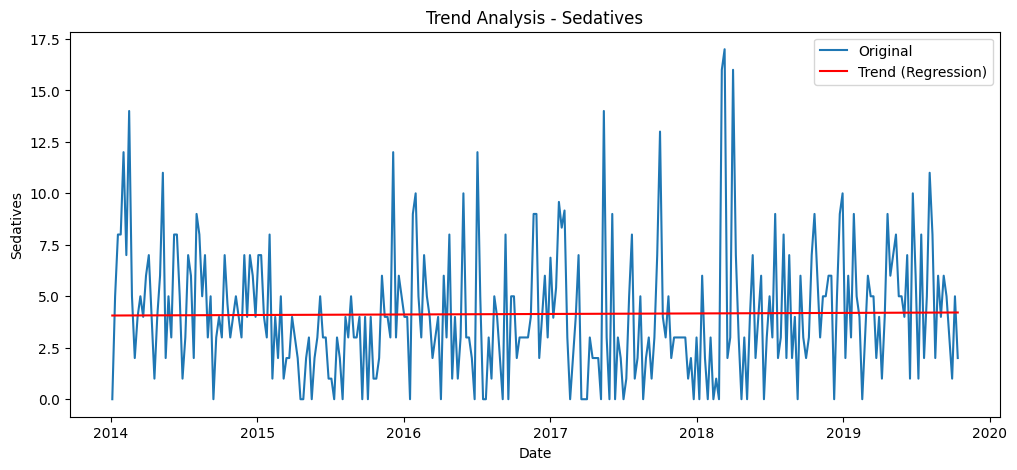

📌 Sedatives Trend: Slope = 0.0005 (Increasing)



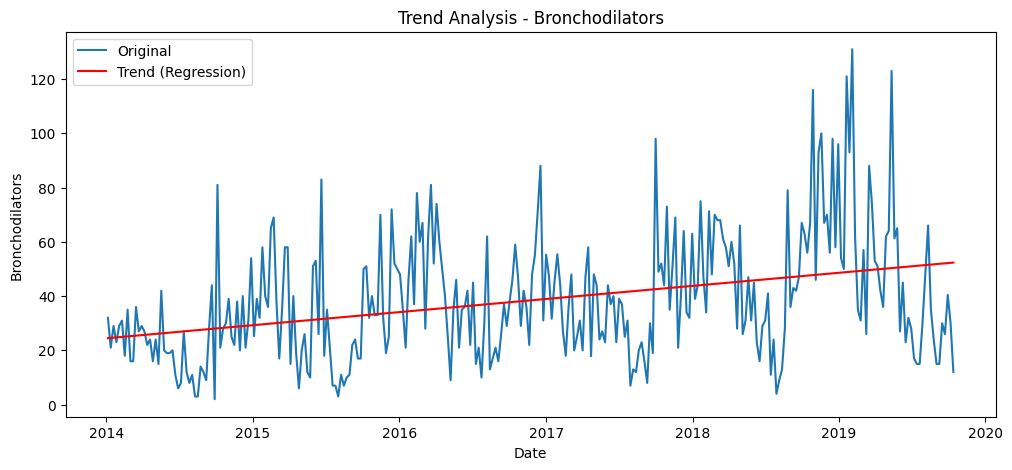

📌 Bronchodilators Trend: Slope = 0.0926 (Increasing)



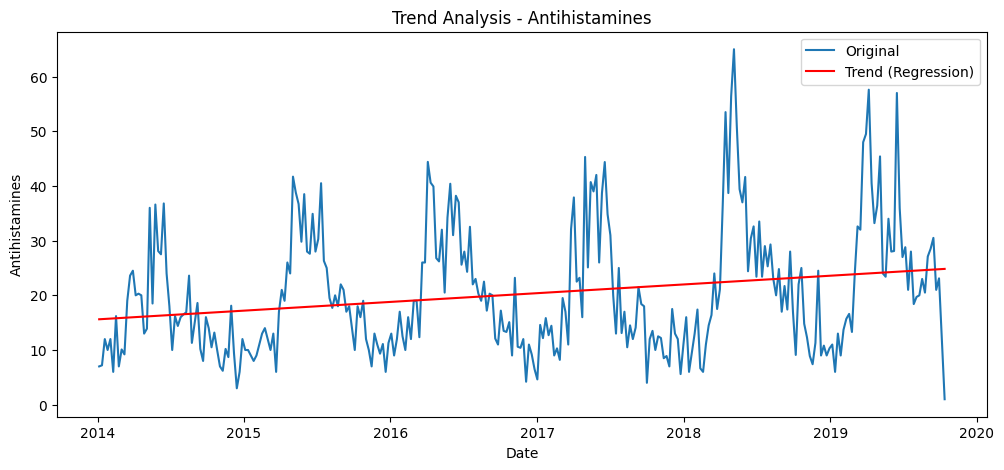

📌 Antihistamines Trend: Slope = 0.0306 (Increasing)



In [3]:
for col in drug_cols:
    plt.figure(figsize=(12,5))
    
    # Prepare data
    y = data[col].values
    X = np.arange(len(y)).reshape(-1, 1)
    
    # Linear regression
    model = LinearRegression()
    model.fit(X, y)
    trend_line = model.predict(X)
    
    # Plot
    plt.plot(data.index, y, label="Original")
    plt.plot(data.index, trend_line, color='red', label="Trend (Regression)")
    plt.title(f"Trend Analysis - {col}")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.legend()
    plt.show()
    
    # Conclusion
    print(f"📌 {col} Trend: Slope = {model.coef_[0]:.4f} ({'Increasing' if model.coef_[0]>0 else 'Decreasing' if model.coef_[0]<0 else 'Stable'})\n")

### Seasonality Using ACF

<Figure size 1200x500 with 0 Axes>

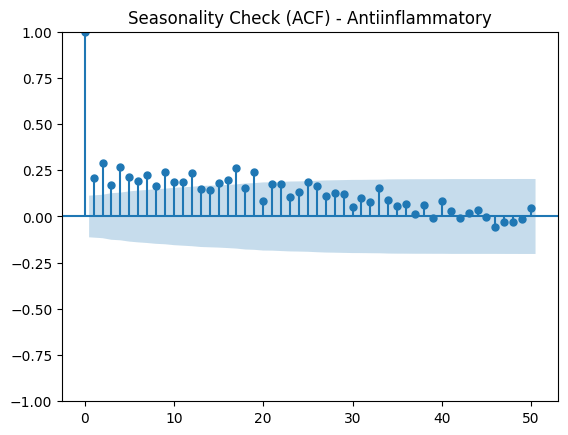

📌 Antiinflammatory Seasonality: Peaks in ACF indicate repeating seasonal patterns.



<Figure size 1200x500 with 0 Axes>

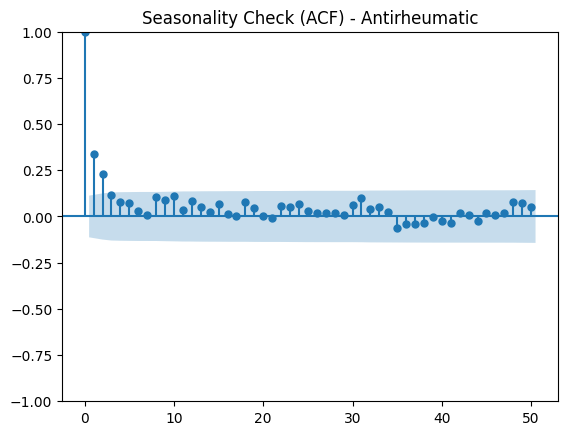

📌 Antirheumatic Seasonality: Peaks in ACF indicate repeating seasonal patterns.



<Figure size 1200x500 with 0 Axes>

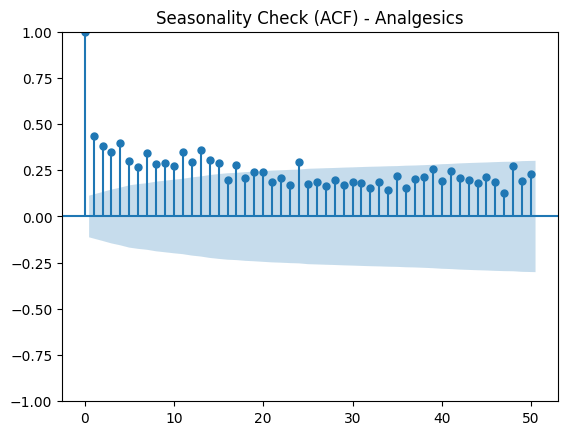

📌 Analgesics Seasonality: Peaks in ACF indicate repeating seasonal patterns.



<Figure size 1200x500 with 0 Axes>

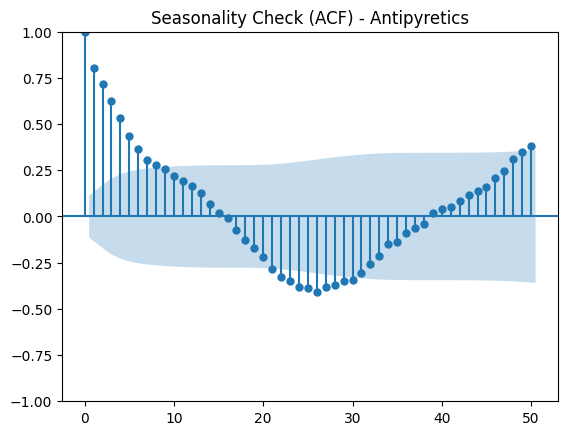

📌 Antipyretics Seasonality: Peaks in ACF indicate repeating seasonal patterns.



<Figure size 1200x500 with 0 Axes>

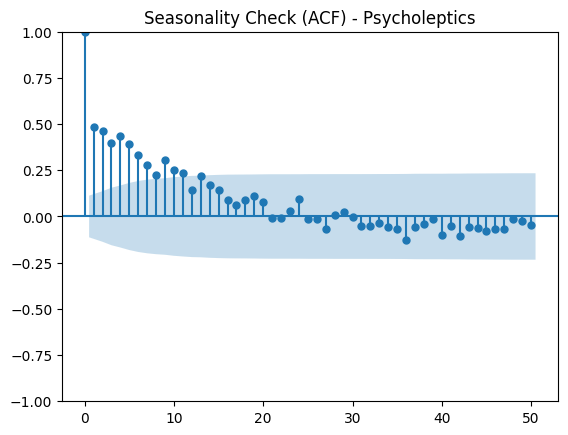

📌 Psycholeptics Seasonality: Peaks in ACF indicate repeating seasonal patterns.



<Figure size 1200x500 with 0 Axes>

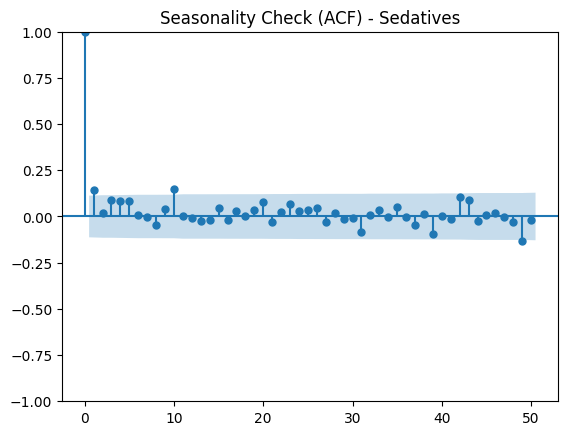

📌 Sedatives Seasonality: Peaks in ACF indicate repeating seasonal patterns.



<Figure size 1200x500 with 0 Axes>

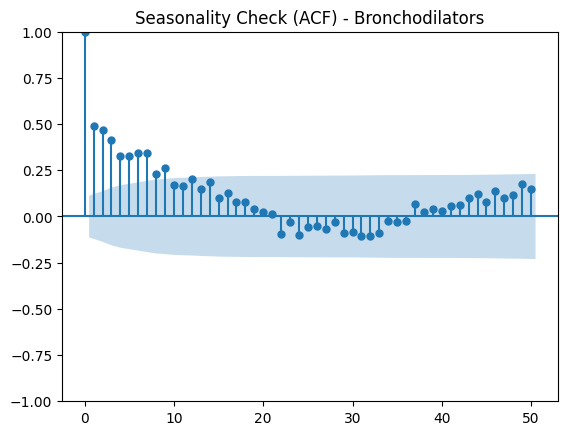

📌 Bronchodilators Seasonality: Peaks in ACF indicate repeating seasonal patterns.



<Figure size 1200x500 with 0 Axes>

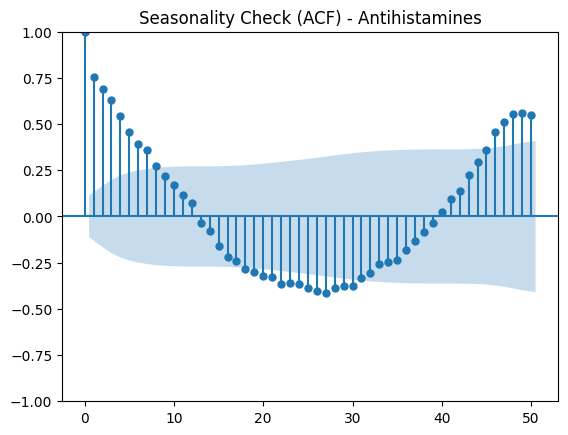

📌 Antihistamines Seasonality: Peaks in ACF indicate repeating seasonal patterns.



In [4]:
from statsmodels.graphics.tsaplots import plot_acf

for col in drug_cols:
    plt.figure(figsize=(12,5))
    plot_acf(data[col].dropna(), lags=50, alpha=0.05)
    plt.title(f"Seasonality Check (ACF) - {col}")
    plt.show()
    
    # Simple interpretation
    print(f"📌 {col} Seasonality: Peaks in ACF indicate repeating seasonal patterns.\n")

### Cycle Detection Using HP Filter

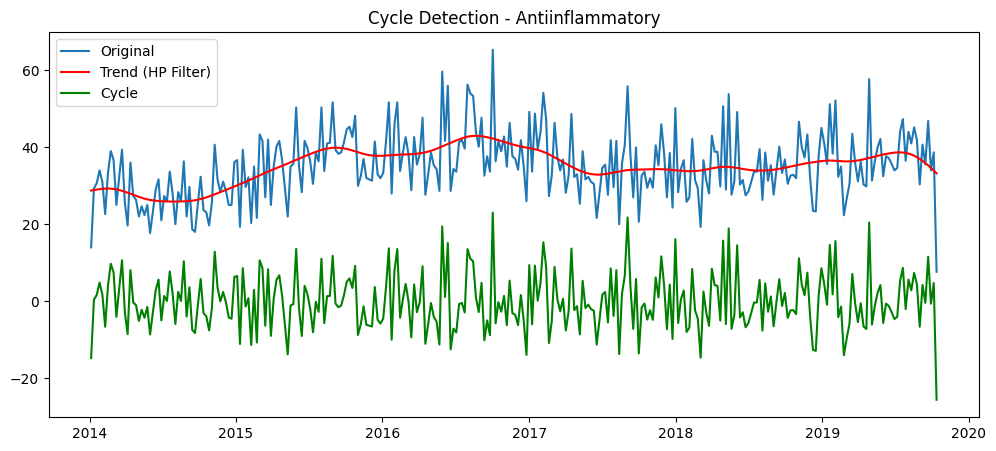

📌 Antiinflammatory Cycle: Deviations from HP trend represent cyclical movements.



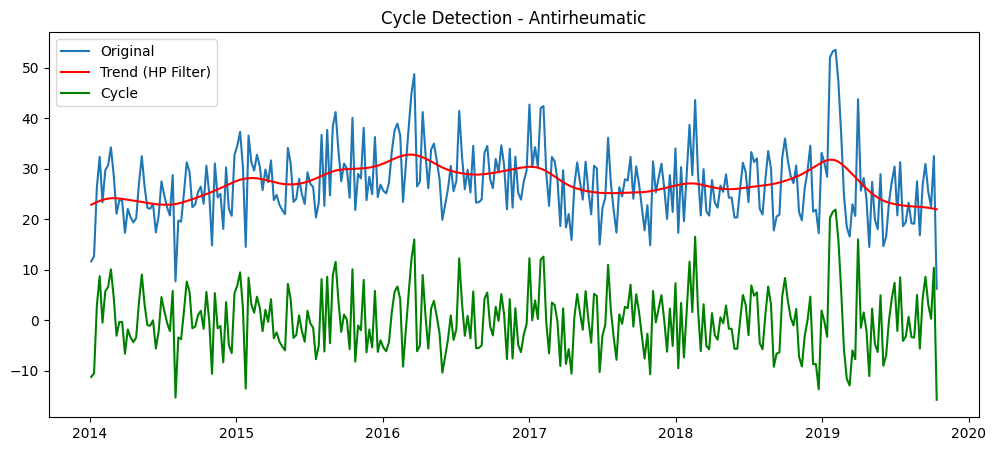

📌 Antirheumatic Cycle: Deviations from HP trend represent cyclical movements.



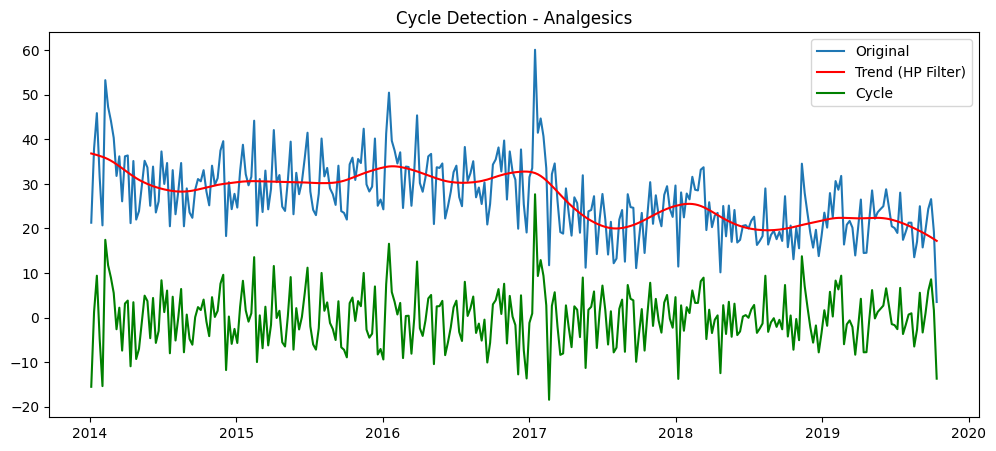

📌 Analgesics Cycle: Deviations from HP trend represent cyclical movements.



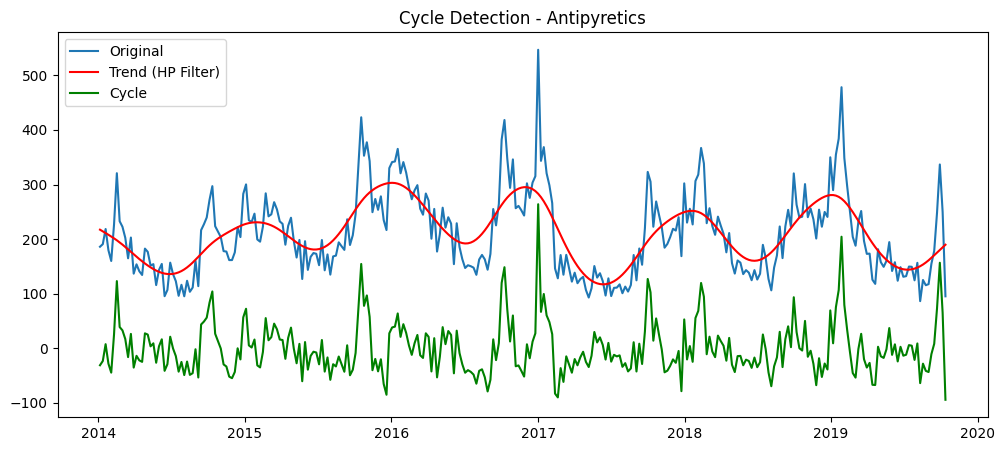

📌 Antipyretics Cycle: Deviations from HP trend represent cyclical movements.



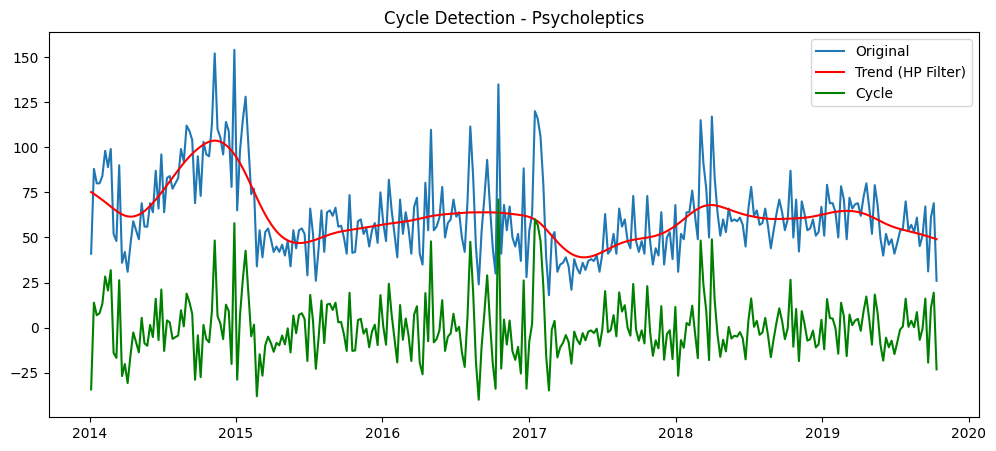

📌 Psycholeptics Cycle: Deviations from HP trend represent cyclical movements.



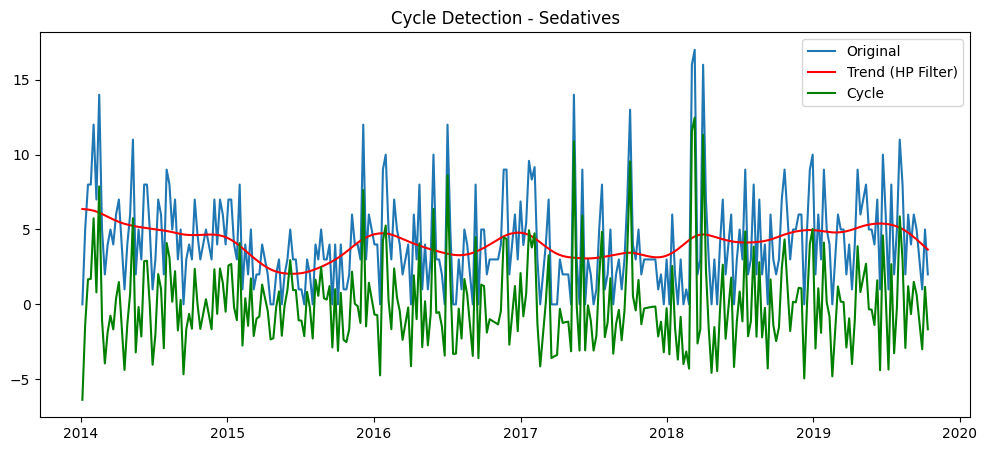

📌 Sedatives Cycle: Deviations from HP trend represent cyclical movements.



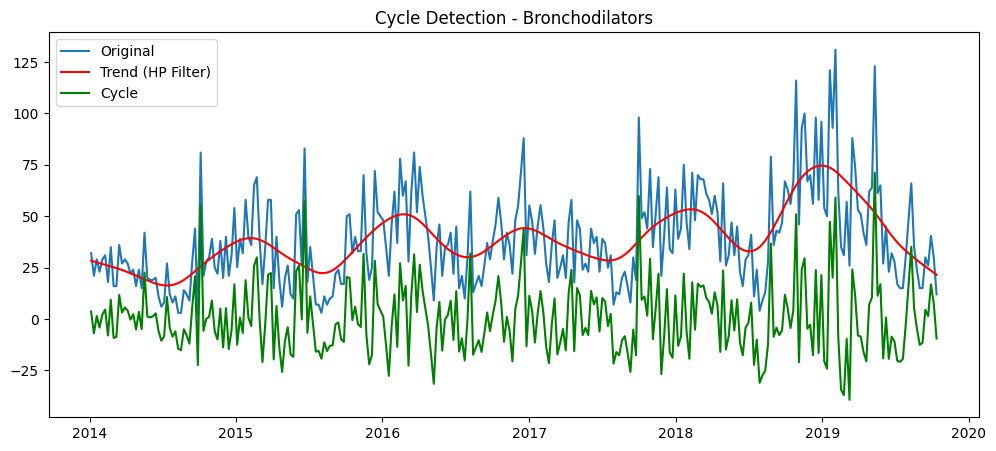

📌 Bronchodilators Cycle: Deviations from HP trend represent cyclical movements.



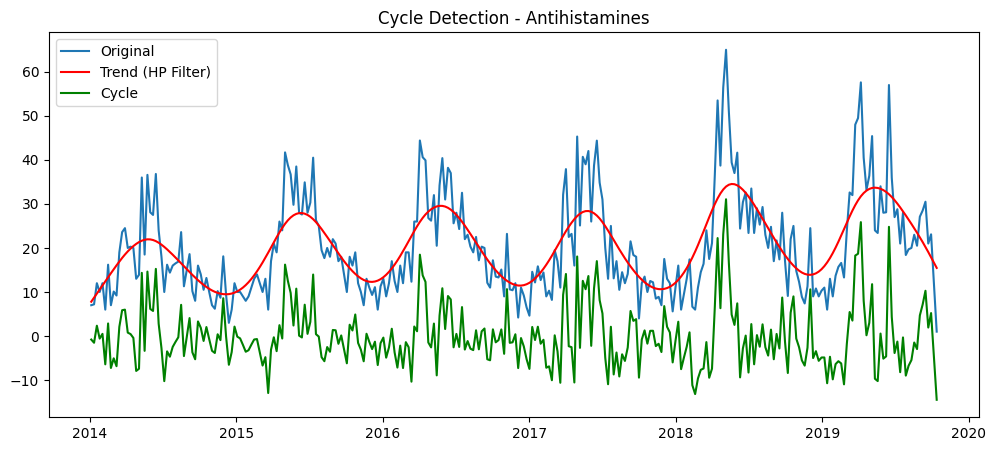

📌 Antihistamines Cycle: Deviations from HP trend represent cyclical movements.



In [5]:
for col in drug_cols:
    cycle, trend = hpfilter(data[col].dropna(), lamb=1600)
    
    plt.figure(figsize=(12,5))
    plt.plot(data.index, data[col], label='Original')
    plt.plot(data.index, trend, color='red', label='Trend (HP Filter)')
    plt.plot(data.index, cycle, color='green', label='Cycle')
    plt.title(f"Cycle Detection - {col}")
    plt.legend()
    plt.show()
    
    # Interpretation
    print(f"📌 {col} Cycle: Deviations from HP trend represent cyclical movements.\n")

### Stationarity Using ADF Test

In [6]:
for col in drug_cols:
    result = adfuller(data[col].dropna())
    adf_stat = result[0]
    p_value = result[1]
    
    print(f"📌 {col} ADF Test: Statistic={adf_stat:.4f}, p-value={p_value:.4f}")
    if p_value < 0.05:
        print(f"    -> {col} is Stationary\n")
    else:
        print(f"    -> {col} is Non-Stationary\n")

📌 Antiinflammatory ADF Test: Statistic=-3.6287, p-value=0.0052
    -> Antiinflammatory is Stationary

📌 Antirheumatic ADF Test: Statistic=-8.7394, p-value=0.0000
    -> Antirheumatic is Stationary

📌 Analgesics ADF Test: Statistic=-1.7214, p-value=0.4201
    -> Analgesics is Non-Stationary

📌 Antipyretics ADF Test: Statistic=-4.3706, p-value=0.0003
    -> Antipyretics is Stationary

📌 Psycholeptics ADF Test: Statistic=-3.5988, p-value=0.0058
    -> Psycholeptics is Stationary

📌 Sedatives ADF Test: Statistic=-15.0005, p-value=0.0000
    -> Sedatives is Stationary

📌 Bronchodilators ADF Test: Statistic=-3.4176, p-value=0.0104
    -> Bronchodilators is Stationary

📌 Antihistamines ADF Test: Statistic=-5.0281, p-value=0.0000
    -> Antihistamines is Stationary



### Summary table

In [7]:
from statsmodels.tsa.stattools import acf

summary = []

for col in drug_cols:
    # 1️⃣ Trend slope
    y = data[col].values
    X = np.arange(len(y)).reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    trend_desc = "Increasing" if slope > 0 else "Decreasing" if slope < 0 else "Stable"
    
    # 2️⃣ Seasonality strength (ACF)
    acf_vals = acf(data[col].dropna(), nlags=50, fft=False)
    # Take max ACF excluding lag 0
    seasonality_strength = np.max(np.abs(acf_vals[1:]))
    
    # 3️⃣ Cycle amplitude (HP filter)
    cycle, trend = hpfilter(data[col].dropna(), lamb=1600)
    cycle_amp = np.std(cycle)
    
    # 4️⃣ Stationarity (ADF test)
    result = adfuller(data[col].dropna())
    p_value = result[1]
    stationarity = "Stationary" if p_value < 0.05 else "Non-Stationary"
    
    summary.append({
        "Drug": col,
        "Trend Slope": slope,
        "Trend": trend_desc,
        "Seasonality Strength (ACF)": seasonality_strength,
        "Cycle Amplitude (HP Filter)": cycle_amp,
        "Stationarity (ADF)": stationarity
    })

# Convert to DataFrame
summary_df = pd.DataFrame(summary)

# Display table
summary_df.style.background_gradient(cmap='coolwarm')

,Drug,Trend Slope,Trend,Seasonality Strength (ACF),Cycle Amplitude (HP Filter),Stationarity (ADF)
0,Antiinflammatory,0.021079,Increasing,0.287591,7.269662,Stationary
1,Antirheumatic,0.000567,Increasing,0.337032,6.271067,Stationary
2,Analgesics,-0.047729,Decreasing,0.432939,6.132539,Non-Stationary
3,Antipyretics,-0.000294,Decreasing,0.803109,47.875538,Stationary
4,Psycholeptics,-0.063018,Decreasing,0.485937,16.633619,Stationary
5,Sedatives,0.000484,Increasing,0.147110,2.916776,Stationary
6,Bronchodilators,0.092558,Increasing,0.487150,17.152466,Stationary
7,Antihistamines,0.030598,Increasing,0.754795,7.100804,Stationary


✅ Explanation:

Trend Slope → numeric slope of regression line; also interpreted as Increasing/Decreasing/Stable.

Seasonality Strength (ACF) → higher value → stronger repeating seasonal patterns.

Cycle Amplitude → standard deviation of HP filter cycle; higher → more pronounced cycles.

Stationarity → ADF test result, “Stationary” or “Non-Stationary”.